**Get the Model weights**



The pre-trained weights :https://drive.google.com/file/d/1nnmYRZDA01ohYvaZGulHgpW4FK8pzOGw/view?usp=sharing

In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
#from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from keras.utils import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.python.framework import tensor_util
#from helperScript import *


In [2]:
def is_tensor(x):
        return tensor_util.is_tensor(x)

In [3]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [4]:
def loadVggFaceModel():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))

    return model

In [6]:
#color = (67,67,67) #gray

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def raceModel():
    model = loadVggFaceModel()
    base_model_output = Sequential()
    base_model_output = Convolution2D(6, (1, 1), name='predictions')(model.layers[-4].output)
    base_model_output = Flatten()(base_model_output)
    base_model_output = Activation('softmax')(base_model_output)
    race_model = Model(inputs=model.input, outputs=base_model_output)
    race_model.load_weights(r'C:\Users\resit\Downloads\AML2\race_model_single_batch.h5')
    return race_model
race_model =raceModel()
races = ['Asian', 'Indian', 'Black', 'White', 'Middle-Eastern', 'Latino_Hispanic']



In [7]:
demo = r"C:\Users\resit\Downloads\AML2\demo"

C:\Users\resit\Downloads\AML2\demo/aaa.png
1/1 [==============================] - 2s 2s/step
Prediction:  Middle-Eastern
---------------------------


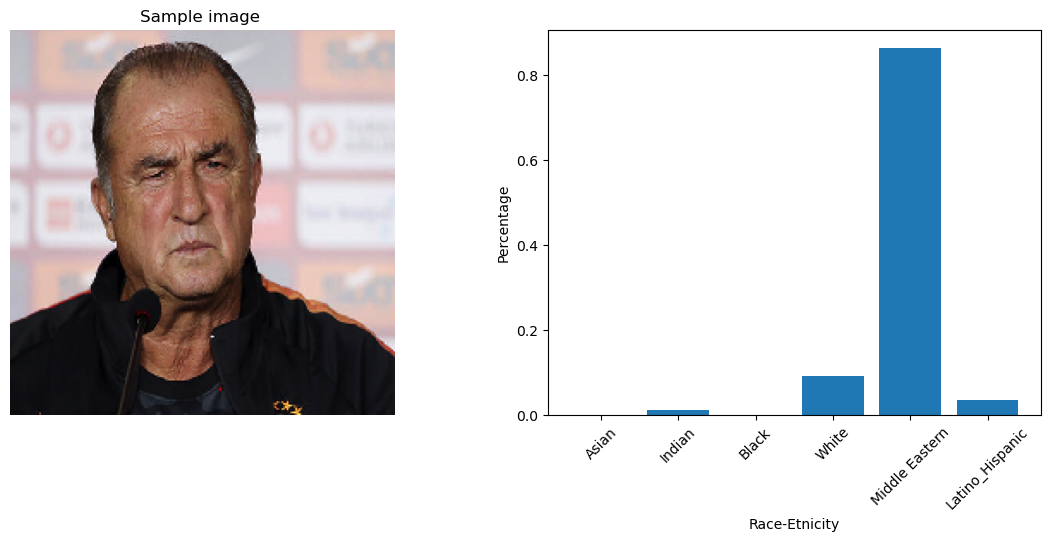

C:\Users\resit\Downloads\AML2\demo/black.png
1/1 [==============================] - 0s 24ms/step
Prediction:  Black
---------------------------


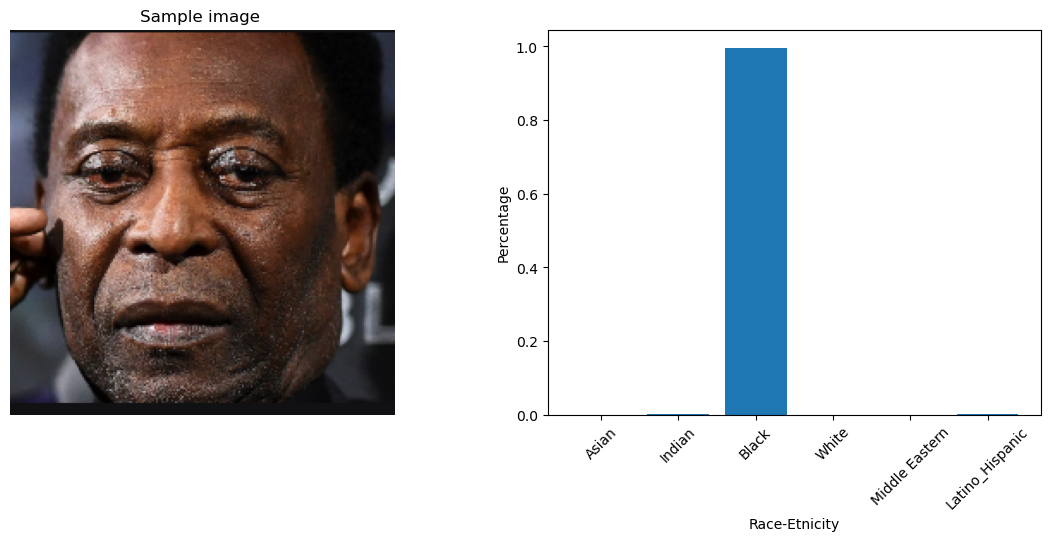

C:\Users\resit\Downloads\AML2\demo/japan.png
1/1 [==============================] - 0s 20ms/step
Prediction:  Asian
---------------------------


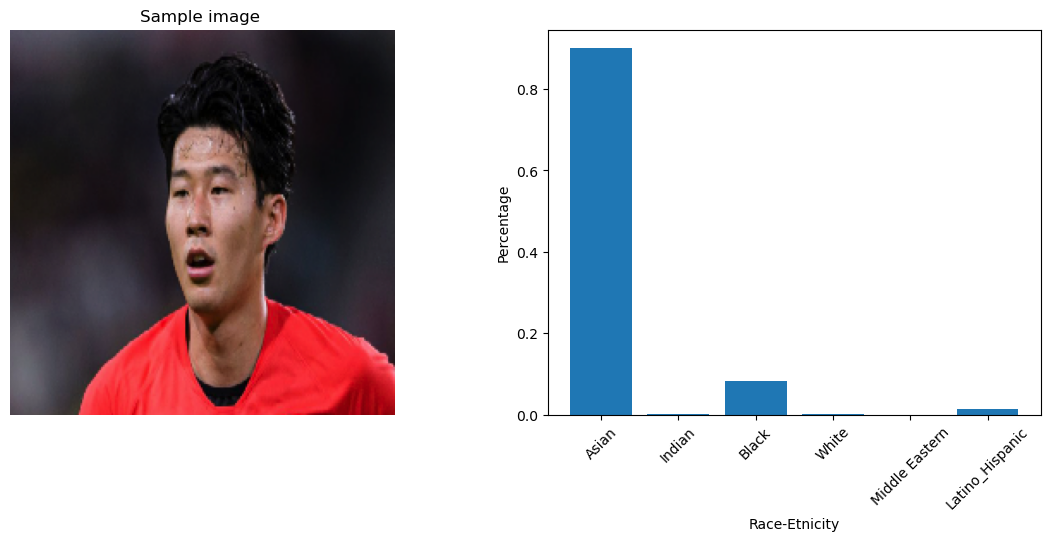

In [8]:
demo_set = ["aaa.png","black.png","japan.png"]
           
            #"morgan.png","white.png","indian.png"]

for file in demo_set:
    path = demo+'/%s' % (file) 
    print(path)
    img = image.load_img(path, grayscale=False, target_size=(224, 224, 3))
    img = image.img_to_array(img).reshape(1, -1)[0]
    img = img.reshape(224, 224, 3)
    img = img / 255

    
    img = np.expand_dims(img, axis=0) 
    prediction_proba = race_model.predict(img)
    print("Prediction: ",races[np.argmax(prediction_proba)])
    print("---------------------------")
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 2)
    
    objects = ('Asian', 'Indian', 'Black', 'White', 'Middle Eastern', 'Latino_Hispanic')
    y_pos = np.arange(len(objects))
    plt.xticks(y_pos, objects)
    plt.bar(y_pos, prediction_proba[0])
    plt.xticks(y_pos, objects,rotation =45)
    plt.ylabel('Percentage')

    plt.xlabel("Race-Etnicity")

    
    plt.subplot(1, 2, 1)
    img = np.array(img, 'float32')
    img = img.reshape([224,224,3]);
    plt.axis('off')
    plt.title("Sample image ")
    plt.gray()
    plt.imshow(img)

    plt.show()
#----------
    
    
    
    